#UNSUPERVISED LEARNING CASESTUDY
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data=pd.read_excel('Wine_d2514b4f8edc4a060153df72bef9d950.xlsx')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [32]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [33]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [34]:
#so no preprocessing required 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [37]:
data1=data.iloc[:,0:2]
data1

,Alcohol,Malic_Acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [38]:
#Kmeans

In [40]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
  model_kmean=KMeans(n_clusters=k)
  model_kmean.fit(data1)
  inertia.append(model_kmean.inertia_)
inertia

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[337.55275842696625,
 168.08374191698118,
 95.55394205616612,
 72.68914691708522,
 60.74287609793349,
 51.951422107445076,
 43.551994018912545,
 36.51155380582138,
 32.37509192131401,
 28.543364904401162]

<function matplotlib.pyplot.show(close=None, block=None)>

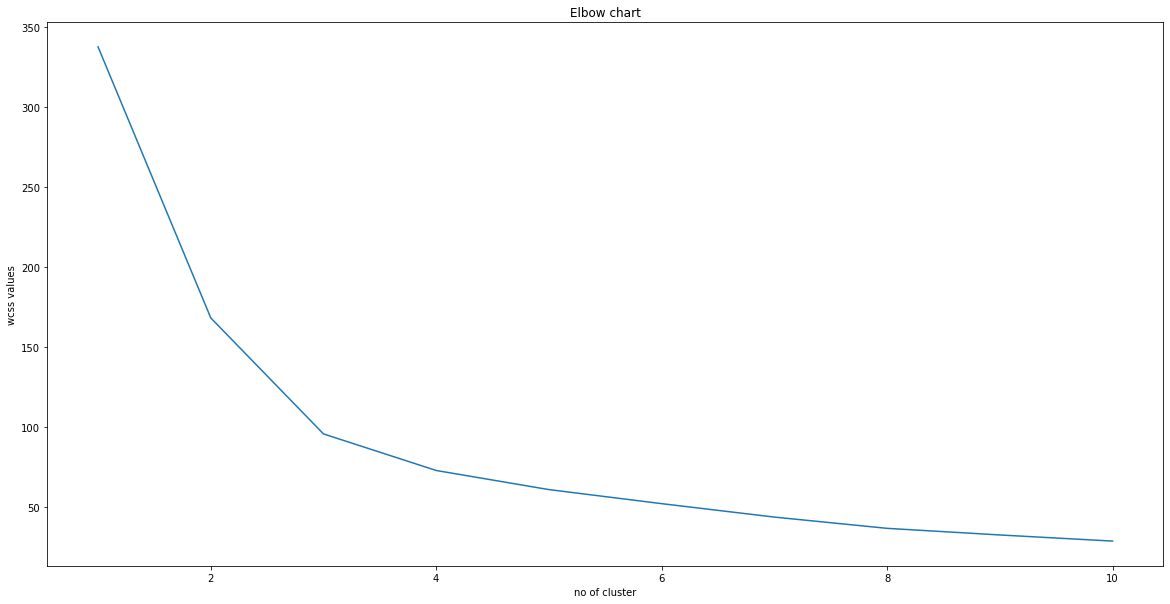

In [41]:
plt.figure(figsize=(20,10))
plt.plot(ks,inertia)
plt.title('Elbow chart')
plt.xlabel('no of cluster')
plt.ylabel('wcss values')
plt.show

In [27]:
#we can take 5 clusters

In [51]:
model_kmeans=KMeans(n_clusters=5)
model_kmeans.fit(data1)
labels=model_kmeans.labels_
labels

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 1, 1, 1, 1, 0, 3, 3, 1, 4, 4, 4, 1, 1, 1, 1, 4, 1, 3,
       3, 0, 1, 3, 4, 4, 0, 3, 3, 2, 0, 4, 0, 0, 4, 4, 0, 0, 0, 3, 2, 0,
       1, 4, 0, 3, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 4, 3, 3, 2, 4, 0, 0,
       3, 0])

Text(0.5, 1.0, 'Alochol vs Malic_Acid')

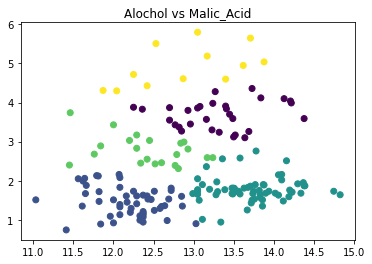

In [60]:
plt.scatter(data1.iloc[:,0],data1.iloc[:,1],c=labels)
plt.title('Alochol vs Malic_Acid')

In [53]:
model_kmeans.inertia_

61.39862479242979

In [45]:
#Heirarchcal clustering

In [46]:
#dendrogram method

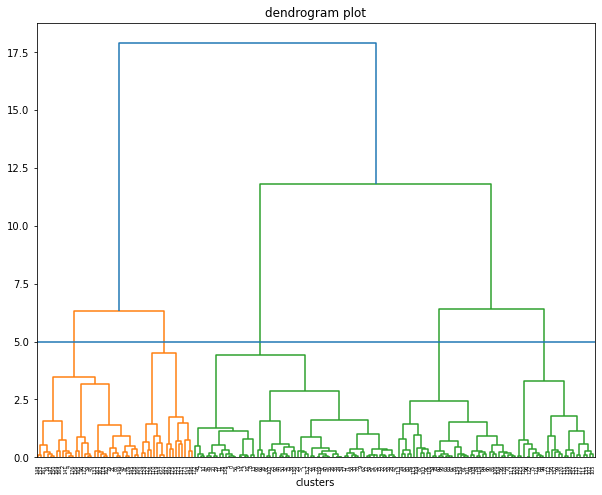

In [54]:
import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(data1,method='ward'))
plt.hlines(5,0,5000)
plt.title('dendrogram plot')
plt.xlabel('clusters')
plt.show()

In [55]:
#there are 5 clusters

In [58]:
from sklearn.cluster import AgglomerativeClustering
HC=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
model_HC=HC.fit(data1)
label_HC=model_HC.labels_
label_HC

array([2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 3, 2, 2, 2, 3, 4, 2, 4, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3,
       4, 3, 3, 3, 2, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 3, 4, 3, 2, 3, 3,
       0, 4, 4, 3, 3, 3, 3, 3, 1, 0, 4, 4, 0, 0, 0, 4, 3, 4, 3, 0, 2, 4,
       4, 1, 3, 4, 0, 0, 1, 4, 4, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 4, 2, 1,
       3, 0, 1, 4, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 4, 2, 0, 1, 0,
       1, 1], dtype=int64)

Text(0.5, 1.0, 'Alochol vs Malic_Acid')

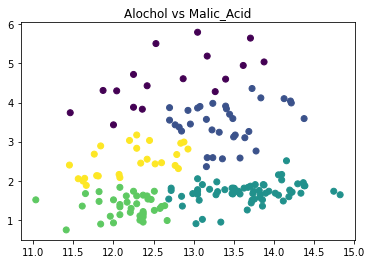

In [61]:
plt.scatter(data1.iloc[:,0],data1.iloc[:,1],c=label_HC)
plt.title('Alochol vs Malic_Acid')

#so we can say that there are **5 clusters** in the data